Datasets can be downloaded from [here](https://www.dropbox.com/sh/yqlclftyolwqy7y/AADVD-_IOqpXQx8PlWcywMypa?dl=0)  
**Datasets have been normalized.**

Ref: Olsson, A. et al. Single-cell analysis of mixed-lineage states leading to a binary cell fate choice. Nature (2016).

In [111]:
import anndata as ad

In [112]:
import stream as st
st.__version__

'1.0'

In [113]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [114]:
adata=st.read(file_name='do/data_Olsson.tsv.gz',delimiter='\t',workdir='./stream_result')

Saving results in: ./stream_result


In [115]:
adata

AnnData object with n_obs × n_vars = 382 × 23955 
    uns: 'workdir'

In [116]:
st.add_cell_labels(adata,file_name='do/cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='do/cell_label_color.tsv.gz')

In [117]:
st.filter_cells(adata,min_n_features= 100,assay='rna')
st.filter_features(adata,min_n_cells = 5,assay='rna')

filter cells based on min_n_features
after filtering out low-quality cells: 
382 cells, 23955 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
382 cells, 12445 genes


500 variable genes are selected


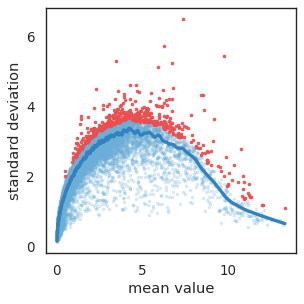

In [118]:
st.select_variable_genes(adata,loess_frac=0.01, n_genes=500)

In [119]:
st.dimension_reduction(adata,method='mlle',feature='var_genes',n_components=4,n_neighbors=50,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


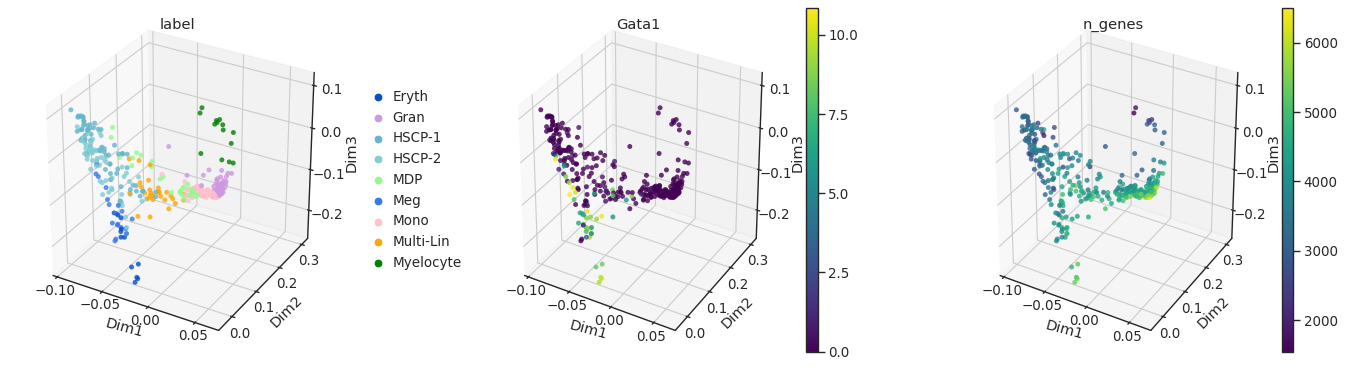

In [120]:
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=3,show_graph=False,show_text=False)

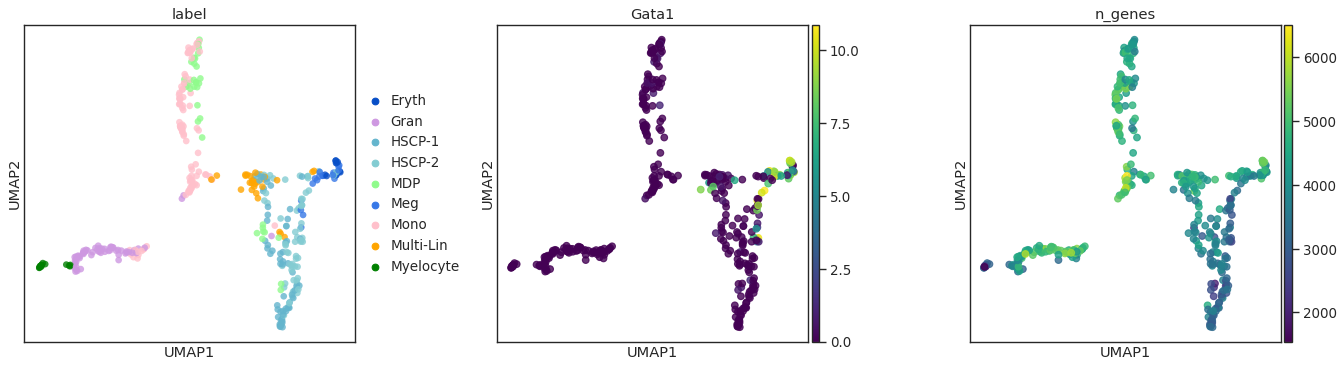

In [121]:
st.plot_visualization_2D(adata,n_neighbors=50,method='umap',color=['label','Gata1','n_genes'],use_precomputed=False)

****By setting `use_vis=True`, we choose the embedding of cells from `plot_visualization_2D()` as the manifold where STREAM learns principal graph****



Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


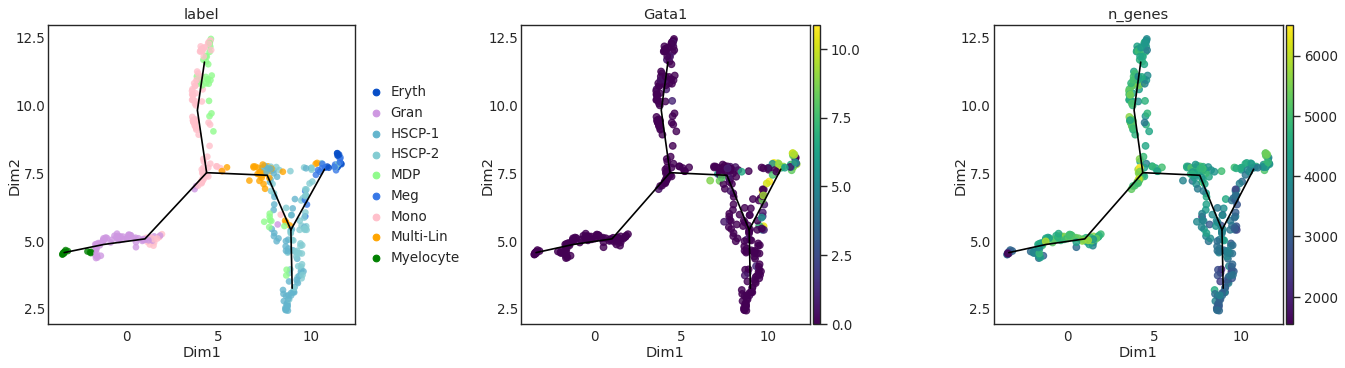

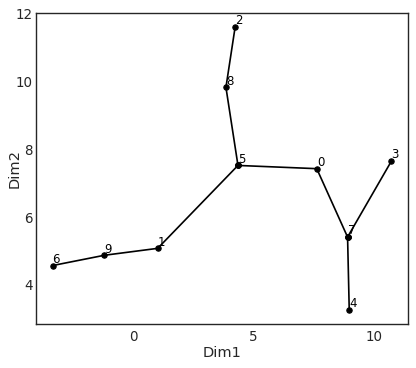

In [122]:
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [123]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 382 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
0.7293
	
50
	
49
	
44
	
2
	
0
	
0
	
0.192
	
0.1797
	
0.9914
	
0.992
	
0.5199
	
0.01731
	
0.8653
	
43.27
	
0


7.006 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


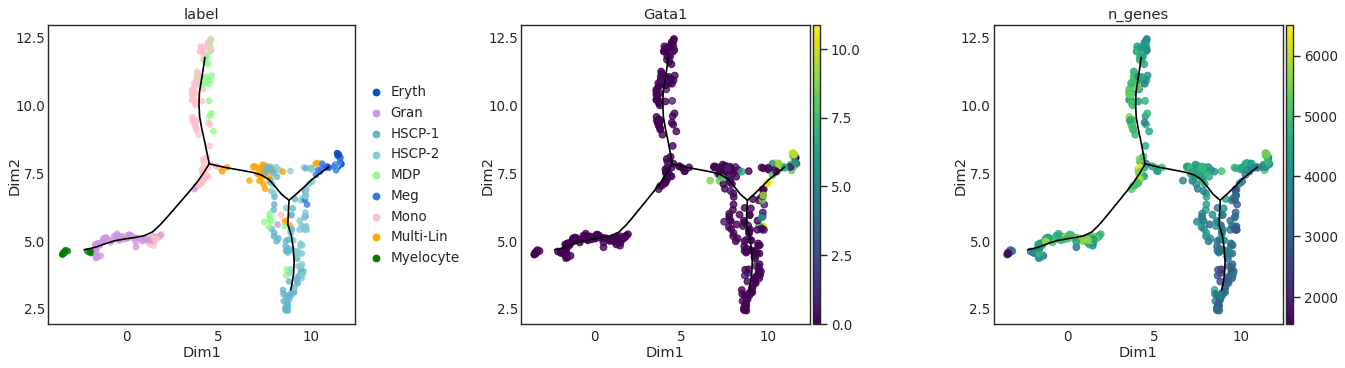

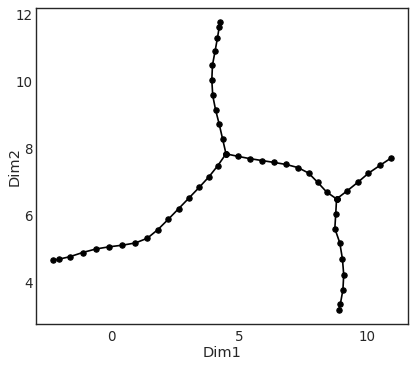

In [124]:
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Shifting branching point to denser area ...
[1]
 "Moving the branching point at node 4"


[1]
 "Moving the branching point at node 5"


[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 46 nodes on 382 points and 2 dimensions"


[1]
 "Using a single core"


0.006 sec elapsed

Number of branches after shifting branching: 5


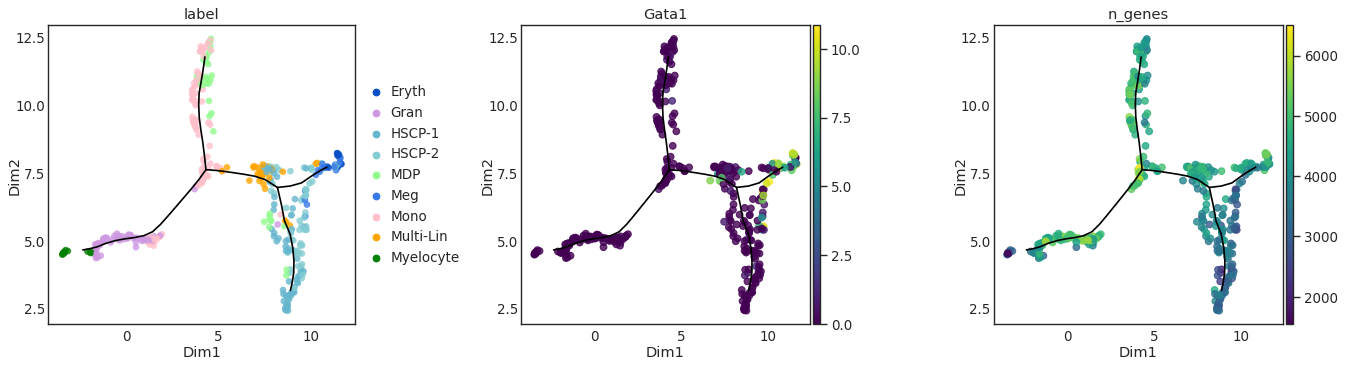

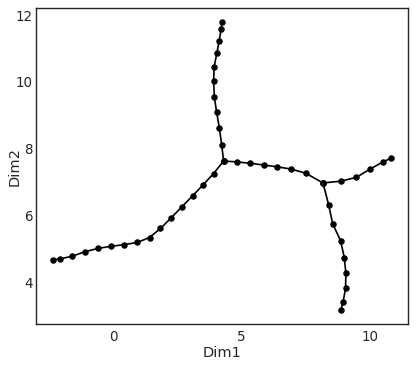

In [125]:
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,color=['label','Gata1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


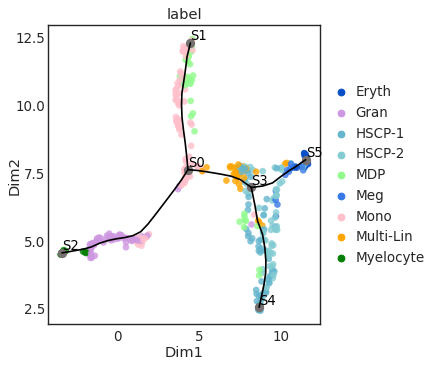

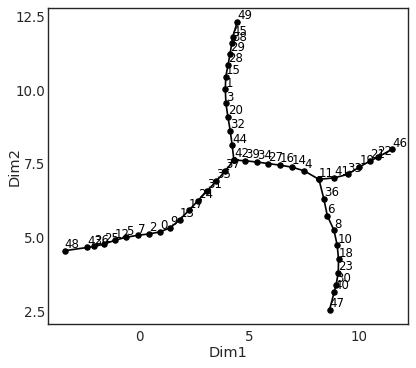

In [126]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

Importing precomputed umap visualization ...


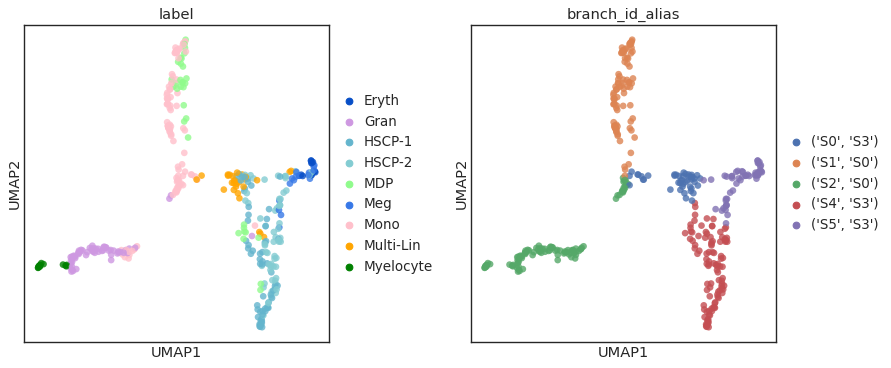

In [127]:
st.plot_visualization_2D(adata,n_neighbors=30,color=['label','branch_id_alias'])

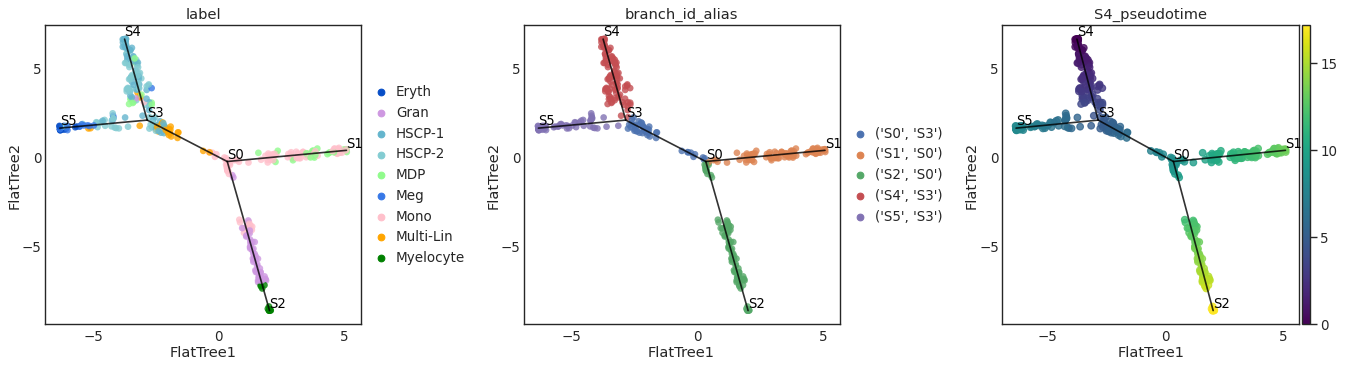

In [128]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S4_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

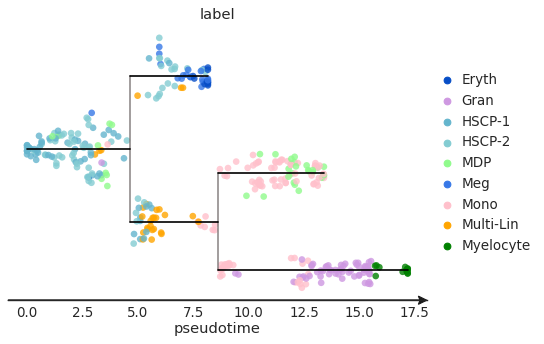

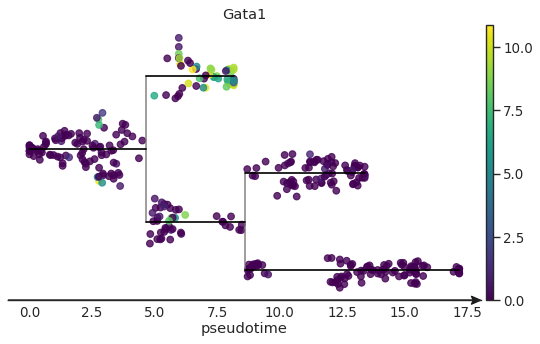

In [129]:
st.plot_stream_sc(adata,root='S4',color=['label','Gata1'],
                  dist_scale=0.5,show_graph=True,show_text=False)

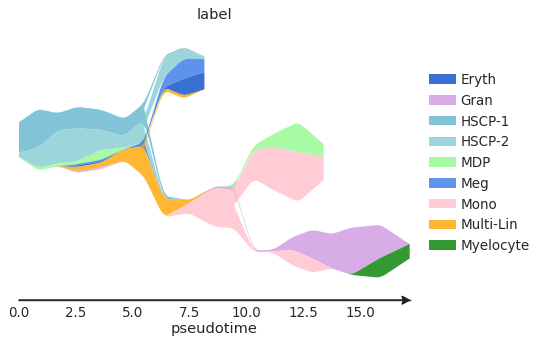

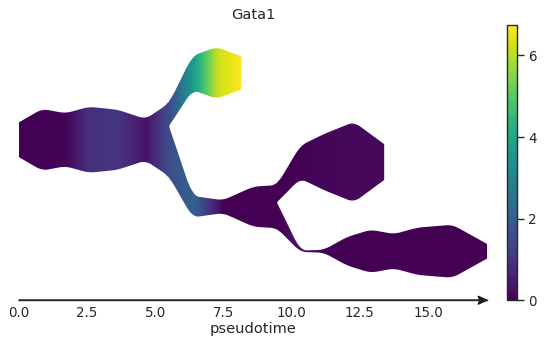

In [130]:
st.plot_stream(adata,root='S4',color=['label','Gata1'])

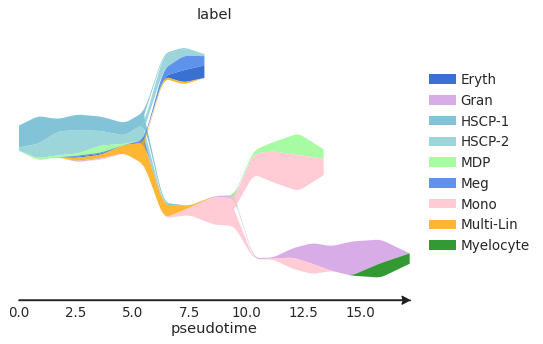

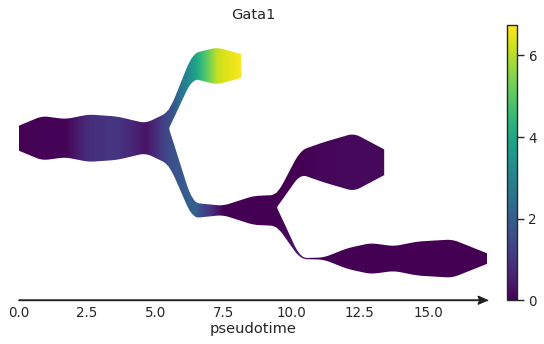

In [131]:
st.plot_stream(adata,root='S4',color=['label','Gata1'],dist_scale=0.6)

## mapping

In [132]:
def map_new_data(adata_ref,adata_new,use_radius=False):
    """ Map new data to the inferred trajectories
    
    Parameters
    ----------
    adata_ref: reference AnnData
        Annotated data matrix.
    adata_new: new AnnData
        Annotated data matrix for new data (to be mapped).
    use_radius: `bool`, optional (default: False)
        Only valid when `method = 'mlle'`. If True, when searching for the neighbors for each cell in MLLE space, STREAM uses a fixed radius instead of a fixed number of cells.
    first_pc: `bool`, optional (default: False)
        Only valid when `feature='top_pcs'` If True, the first principal component will be included
    top_pcs_feature: `str`, optional (default: None)
        Choose from {{'var_genes'}}
        Only valid when `feature='top_pcs'`.
        Features used for pricipal component analysis
        If None, all the genes will be used.
        IF 'var_genes', the most variable genes obtained from select_variable_genes() will be used.        
    Returns
    -------  
    
    Combined AnnData object. Only the shared obs_keys and var_keys will be preserved
    updates `adata` with the following fields.
    batch: `pandas.Series` (`adata.obs['batch']`,dtype `str`)
        The annotation of each cell. It consists of 'ref' for reference cells and 'new' for the cells to map    

    updates `adata_new` with the following fields.(depending on the `feature` or `method`)
    var_genes: `numpy.ndarray` (`adata_new.obsm['var_genes']`)
        Store #observations × #var_genes data matrix used mapping.
    var_genes: `pandas.core.indexes.base.Index` (`adata_new.uns['var_genes']`)
        The selected variable gene names.
    top_pcs: `numpy.ndarray` (`adata_new.obsm['top_pcs']`)
        Store #observations × n_pc data matrix used for subsequent dimension reduction.
    X_dr : `numpy.ndarray` (`adata_new.obsm['X_dr']`)
        A #observations × n_components data matrix after dimension reduction.
    X_mlle : `numpy.ndarray` (`adata_new.obsm['X_mlle']`)
        Store #observations × n_components data matrix after mlle.
    X_umap : `numpy.ndarray` (`adata_new.obsm['X_umap']`)
        Store #observations × n_components data matrix after umap.
    X_pca : `numpy.ndarray` (`adata_new.obsm['X_pca']`)
        Store #observations × n_components data matrix after pca.
    X_vis_umap: `numpy.ndarray` (`adata.obsm['X_vis_umap']`)
        Store #observations × 2 umap data matrix. 
    X_vis_tsne: `numpy.ndarray` (`adata.obsm['X_vis_tsne']`)
        Store #observations × 2 tsne data matrix.  
    """

    feature = adata_ref.uns['params']['dimension_reduction']['feature']
    method = adata_ref.uns['params']['dimension_reduction']['method']
    assert (method in ['mlle','umap','pca']),"'%s' is not supported. Please use one of 'mlle','umap', and 'pca' for dimension reduction." %method
    if(feature == 'var_genes'):
        print('Top variable genes are being used for mapping ...')
        if('var_genes' not in adata_ref.uns_keys()):
            raise ValueError("variable genes are not selected yet in `adata_ref`")
        for x in adata_ref.uns['var_genes']:
            if(x not in adata_new.var_names):
                raise ValueError("variable gene '%s' does not exist in `adata_new.var_names`"  % (x))
        adata_new.uns['var_genes'] = adata_ref.uns['var_genes'].copy()
        adata_new.obsm['var_genes'] = adata_new[:,adata_new.uns['var_genes']].X.copy()
        input_data = adata_new.obsm['var_genes']
    # if(feature == 'all'):
    #     print('All genes are being used for mapping ...')
    #     if(not set(adata_ref.var_names) <= set(adata_new.var_names)):
    #         raise ValueError("`adata_new.var_names` does not contain all the genes in `adata_ref.var_names`")
    #     input_data = adata_new[:,adata_ref.var.index].X
    # if(feature == 'top_pcs'):
    #     print('Top principal components are being used for mapping ...')
    #     if('top_pcs' not in adata_ref.uns_keys()):
    #         raise ValueError("top principal components are not selected yet in `adata_ref`")
    #     trans = adata_ref.uns['top_pcs']
    #     top_pcs_feature = adata_ref.uns['params']['select_top_principal_components']['feature']
    #     if(top_pcs_feature == 'var_genes'):
    #         if('var_genes' not in adata_ref.uns_keys()):
    #             raise ValueError("variable genes are not selected yet in `adata_ref`")
    #         adata_new.uns['var_genes'] = adata_ref.uns['var_genes'].copy()
    #         adata_new.obsm['var_genes'] = adata_new[:,adata_new.uns['var_genes']].X.copy()
    #         X_pca = trans.transform(adata_new.obsm['var_genes']) 
    #     else:
    #         X_pca = trans.transform(adata_new[:,adata_ref.var.index].X) 
    #     n_pc = adata_ref.obsm['top_pcs'].shape[1]
    #     first_pc = adata_ref.uns['params']['select_top_principal_components']['first_pc']
    #     if(first_pc):
    #         adata_new.obsm['top_pcs'] = X_pca[:,0:(n_pc)]
    #     else:
    #         #discard the first Principal Component
    #         adata_new.obsm['top_pcs'] = X_pca[:,1:(n_pc+1)]
    #     input_data = adata_new.obsm['top_pcs']
    adata_new.uns['epg'] = adata_ref.uns['epg'].copy()
    adata_new.uns['flat_tree'] = adata_ref.uns['flat_tree'].copy() 

    print("method '%s' is being used for mapping ..." %method)
    if(method == 'mlle'):
        if('trans_mlle' in adata_ref.uns_keys()):
            trans = adata_ref.uns['trans_mlle']
            if(use_radius):
                dist_nb = trans.nbrs_.kneighbors(input_data, n_neighbors=trans.n_neighbors,return_distance=True)[0]
                ind = trans.nbrs_.radius_neighbors(input_data, radius = dist_nb.max(),return_distance=False)    
                new_X_mlle = np.empty((input_data.shape[0], trans.n_components))
                for i in range(input_data.shape[0]):
                    weights = barycenter_weights_modified(input_data[i], trans.nbrs_._fit_X[ind[i]],reg=trans.reg)
                    new_X_mlle[i] = np.dot(trans.embedding_[ind[i]].T, weights) 
                adata_new.obsm['X_mlle_mapping'] = new_X_mlle              
            else:
                adata_new.obsm['X_mlle_mapping'] = trans.transform(input_data)
            adata_new.obsm['X_dr'] = adata_new.obsm['X_mlle_mapping'].copy()
        else:
            raise Exception("Please run 'st.dimension_reduction()' using 'mlle' first.")  
    # if(method == 'umap'):
    #     if('trans_umap' in adata_ref.uns_keys()):
    #         trans = adata_ref.uns['trans_umap']
    #         adata_new.obsm['X_umap_mapping'] = trans.transform(input_data)
    #         adata_new.obsm['X_dr'] = adata_new.obsm['X_umap_mapping'].copy()
    #     else:
    #         raise Exception("Please run 'st.dimension_reduction()' using 'umap' first.")  
    # if(method == 'pca'):
    #     if('trans_pca' in adata_ref.uns_keys()):            
    #         trans = adata_ref.uns['trans_pca']
    #         adata_new.obsm['X_pca_mapping'] = trans.transform(input_data)
    #         adata_new.obsm['X_dr'] = adata_new.obsm['X_pca_mapping'].copy()
    #     else:
    #         raise Exception("Please run 'st.dimension_reduction()' using 'pca' first.")  

    if('plot_visualization_2D' in adata_ref.uns['params'].keys()):
        print('Visualizing new cells on 2D plane ...')
        vis_method = adata_ref.uns['params']['plot_visualization_2D']['method']
        vis_trans = 'vis_trans_' + vis_method
        trans = adata_ref.uns[vis_trans]
        adata_new.obsm['X_vis_'+vis_method] = trans.transform(adata_new.obsm['X_dr'])
        if(adata_ref.uns['params']['epg']['use_vis']):
            print("Using the manifold from `plot_visualization_2D()` ")
            adata_new.obsm['X_dr'] = adata_new.obsm['X_vis_'+vis_method]
            
    st.project_cells_to_epg(adata_new)
    st.calculate_pseudotime(adata_new)
    adata_combined = adata_ref.concatenate(adata_new,batch_categories=['ref','new'], join = "outer")
    
    shared_obsm_keys = [x for x in adata_new.obsm_keys() if x in adata_ref.obsm_keys()]
    for key in shared_obsm_keys:
        p1 = adata_ref.obsm[key]
        p2 = adata_new.obsm[key]
        adata_combined.obsm[key] = np.concatenate((p1, p2))
    
#     adata_combined = ad.concat([adata_ref, adata_new], merge = "unique", label = "batch")
    shared_obs_key = [x for x in adata_new.obs_keys() if x in adata_ref.obs_keys()]
    shared_var_key = [x for x in adata_new.var_keys() if x in adata_ref.var_keys()]
    adata_combined.obs = adata_combined.obs[shared_obs_key+['batch']]
    adata_combined.var = adata_combined.var[shared_var_key]
    adata_combined.uns['workdir'] = adata_new.uns['workdir']
    for key in adata_ref.uns_keys():
        if key in ['var_genes', 'epg', 'flat_tree','vis_trans_tsne','vis_trans_umap']:
            adata_combined.uns[key] = adata_ref.uns[key]
        if(key.split('_')[-1]=='color'):
            if(key in adata_new.uns_keys()):
                adata_combined.uns[key] = {**adata_ref.uns[key],**adata_new.uns[key]}
    return(adata_combined)

In [133]:
adata_new=st.read(file_name='do/data_perturbation.tsv.gz',workdir='./stream_mapping_result/')
st.add_cell_labels(adata_new,file_name='do/cell_perturbation_label.tsv.gz')
st.add_cell_colors(adata_new,file_name='do/cell_perturbation_label_color.tsv.gz')

Saving results in: ./stream_mapping_result/


> Here the input datasets have been normalized. So we skipped the normalization step. For new datasets with raw counts, please exectute:
```python
st.normalize(adata_new,method='lib_size')
st.log_transform(adata_new)
st.remove_mt_genes(adata_new)
```

In [134]:
adata_new

AnnData object with n_obs × n_vars = 188 × 23955 
    obs: 'label'
    uns: 'workdir', 'label_color'

In [135]:
adata_combined = map_new_data(adata,adata_new)

Top variable genes are being used for mapping ...
method 'mlle' is being used for mapping ...
Visualizing new cells on 2D plane ...
Using the manifold from `plot_visualization_2D()` 


In [141]:
new_batch = adata_combined[adata_combined.obs["batch"] == "new"]

In [137]:
adata_combined.obs["batch"]

Lsk.3-ref                 ref
Lsk.80-ref                ref
Lsk.81-ref                ref
Lsk.65-ref                ref
Lsk.16-ref                ref
                         ... 
Gfi1--Irf8--.Gfi17-new    new
Gfi1--Irf8--.H7-new       new
Gfi1--Irf8--.A8-new       new
Gfi1--Irf8--.C8-new       new
Gfi1--Irf8--.E8-new       new
Name: batch, Length: 570, dtype: category
Categories (2, object): [ref, new]

In [149]:
irf8 = new_batch[new_batch.obs["label"] == "Irf8--"]
gfil = new_batch[new_batch.obs["label"] == "Gfi1--"]
both = new_batch[new_batch.obs["label"] == "Gfi1--Irf8--"]
irf8.write_h5ad("irf8_mapped.h5ad")
gfil.write_h5ad("gfil_mapped.h5ad")
both.write_h5ad("both_mapped.h5ad")
irf8, gfil, both

Trying to set attribute `.obs` of view, making a copy.
... storing 'label' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id_alias' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'label' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id_alias' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'label' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'branch_id_alias' as categorical


(AnnData object with n_obs × n_vars = 62 × 23955 
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch'
     uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap'
     obsm: 'var_genes', 'X_dr', 'X_vis_umap',
 AnnData object with n_obs × n_vars = 79 × 23955 
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch'
     uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap'
     obsm: 'var_genes', 'X_dr', 'X_vis_umap',
 AnnData object with n_obs × n_vars = 47 × 23955 
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 

In [146]:
new_batch.obs.label

Irf8.Null.10-new                Irf8--
Irf8.Null.11-new                Irf8--
Irf8.Null.12-new                Irf8--
Irf8.Null.13-new                Irf8--
Irf8.Null.14-new                Irf8--
                              ...     
Gfi1--Irf8--.Gfi17-new    Gfi1--Irf8--
Gfi1--Irf8--.H7-new       Gfi1--Irf8--
Gfi1--Irf8--.A8-new       Gfi1--Irf8--
Gfi1--Irf8--.C8-new       Gfi1--Irf8--
Gfi1--Irf8--.E8-new       Gfi1--Irf8--
Name: label, Length: 188, dtype: object

In [72]:
adata_combined

AnnData object with n_obs × n_vars = 570 × 23955 
    obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch'
    uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap'
    obsm: 'var_genes', 'X_dr', 'X_vis_umap'

In [73]:
adata_combined.obs.head()

,label,node,branch_id,branch_id_alias,branch_lam,branch_dist,S0_pseudotime,S3_pseudotime,S5_pseudotime,S4_pseudotime,S2_pseudotime,S1_pseudotime,batch
Lsk.3-ref,HSCP-1,23,"(47, 11)","(S4, S3)",1.401050,0.526706,7.204265,3.251385,6.758794,1.401050,15.772697,11.992853,ref
Lsk.80-ref,HSCP-1,47,"(47, 11)","(S4, S3)",0.048659,0.056745,8.556656,4.603776,8.111185,0.048659,17.125088,13.345244,ref
Lsk.81-ref,HSCP-1,40,"(47, 11)","(S4, S3)",0.496168,0.100695,8.109147,4.156268,7.663676,0.496168,16.677579,12.897735,ref
Lsk.65-ref,HSCP-1,47,"(47, 11)","(S4, S3)",0.000000,0.151354,8.605316,4.652436,8.159845,0.000000,17.173748,13.393903,ref
Lsk.16-ref,HSCP-1,40,"(47, 11)","(S4, S3)",0.450611,0.040671,8.154705,4.201825,7.709234,0.450611,16.723137,12.943292,ref


In [74]:
### add new labels to highlight the new data
adata_combined.obs['label_new'] = ''
adata_combined.obs.loc[adata.obs_names+'-ref','label_new'] = 'ref'
adata_combined.obs.loc[adata_new.obs_names+'-new','label_new'] = adata_combined.obs.loc[adata_new.obs_names+'-new','label']
adata_combined.uns['label_new_color'] = {'ref':'gray',**adata_new.uns['label_color']}

In [75]:
adata_combined

AnnData object with n_obs × n_vars = 570 × 23955 
    obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch', 'label_new'
    uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'label_new_color'
    obsm: 'var_genes', 'X_dr', 'X_vis_umap'

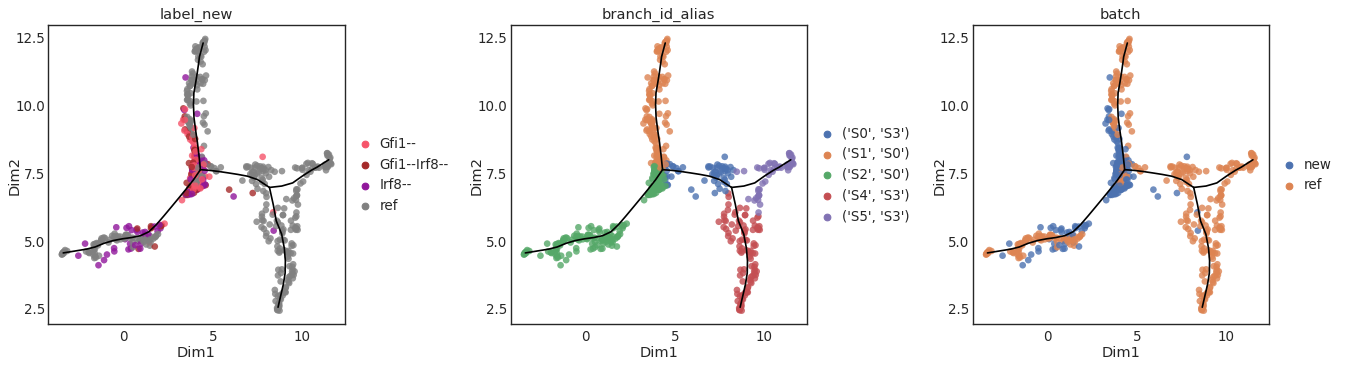

In [78]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['label_new','branch_id_alias','batch'],show_graph=True,show_text=False)

Importing precomputed umap visualization ...


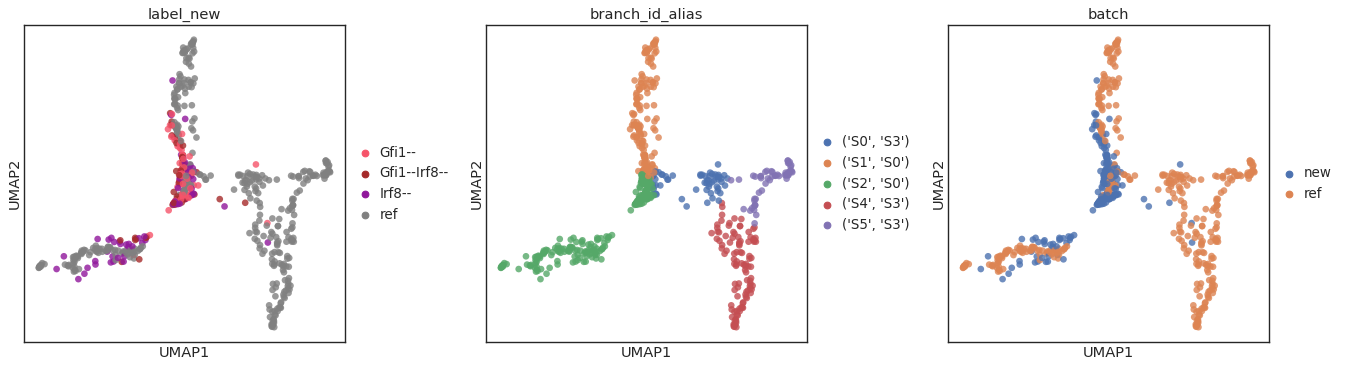

In [79]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

Importing precomputed umap visualization ...


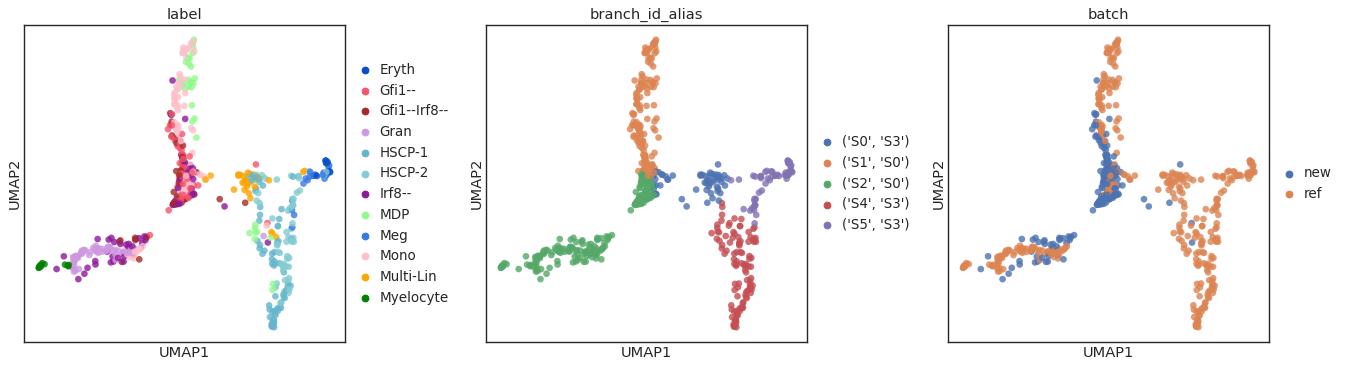

In [80]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label','branch_id_alias','batch'],fig_ncol=4)

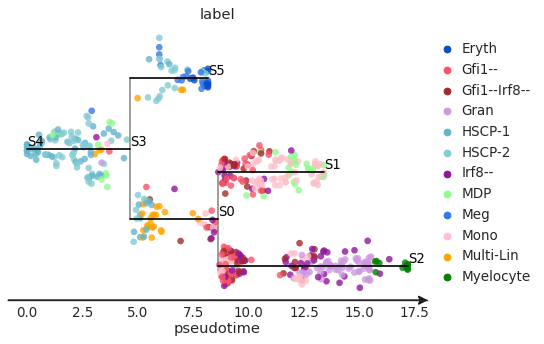

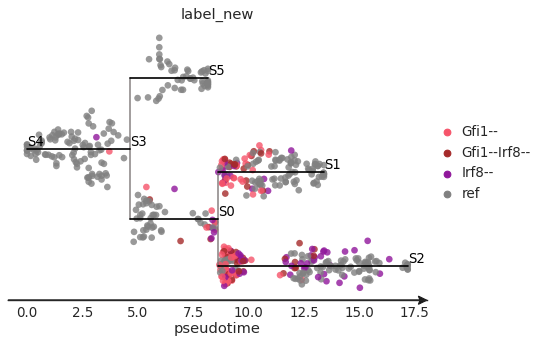

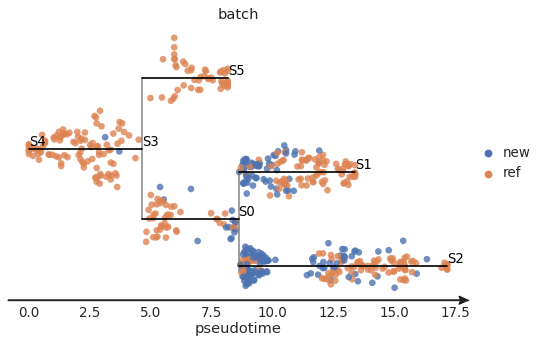

In [81]:
st.plot_stream_sc(adata_combined,root='S4',color=['label','label_new','batch'],
                  dist_scale=0.5,show_graph=True,show_text=True)

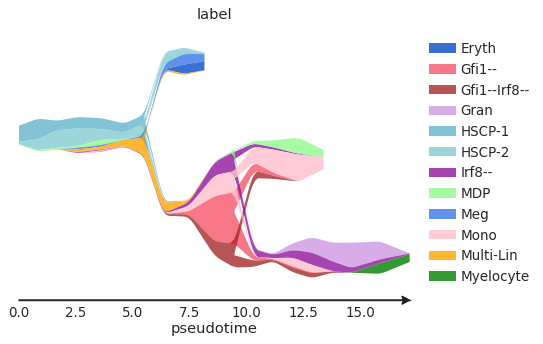

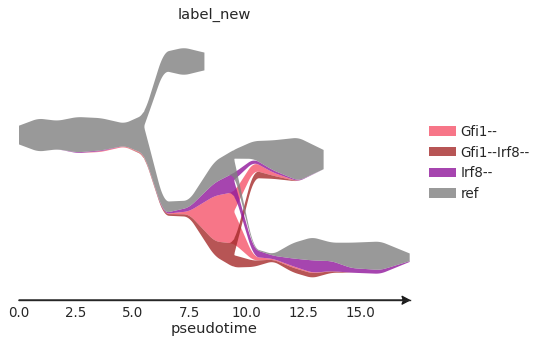

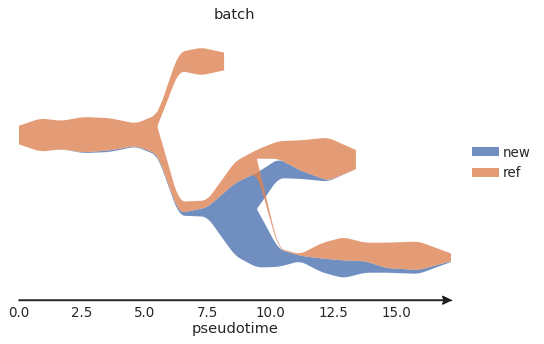

In [82]:
st.plot_stream(adata_combined,root='S4',color=['label','label_new','batch'],dist_scale=1.2)

#### Visualize each perturbation dataset independently

In [84]:
import numpy as np

In [85]:
adata_combined_Gfi1_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--','ref'])].copy()

Importing precomputed umap visualization ...


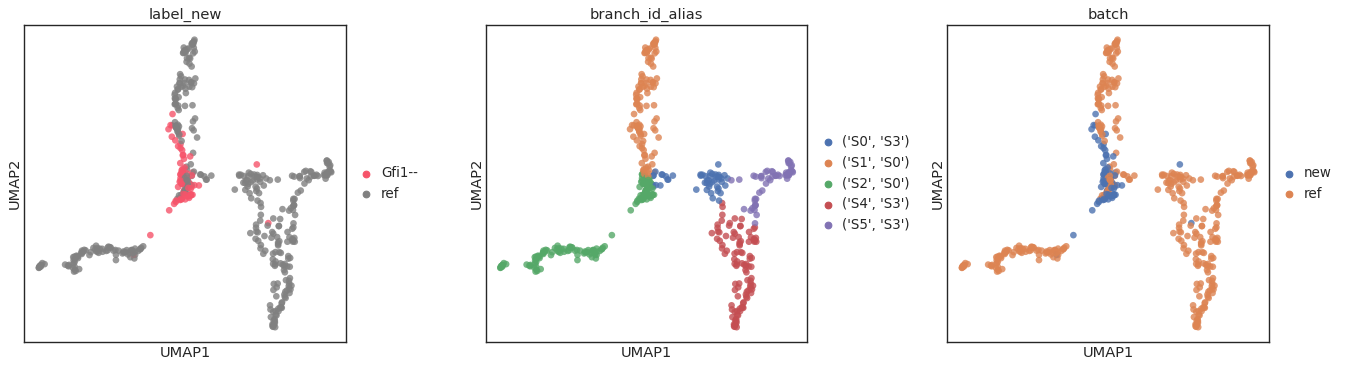

In [86]:
st.plot_visualization_2D(adata_combined_Gfi1_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

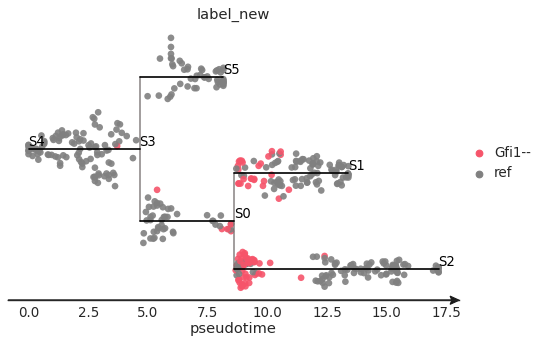

In [87]:
st.plot_stream_sc(adata_combined_Gfi1_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

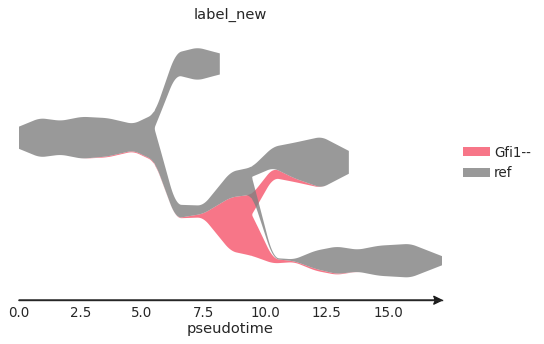

In [88]:
st.plot_stream(adata_combined_Gfi1_Null,root='S4',color=['label_new'])

In [89]:
adata_combined_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


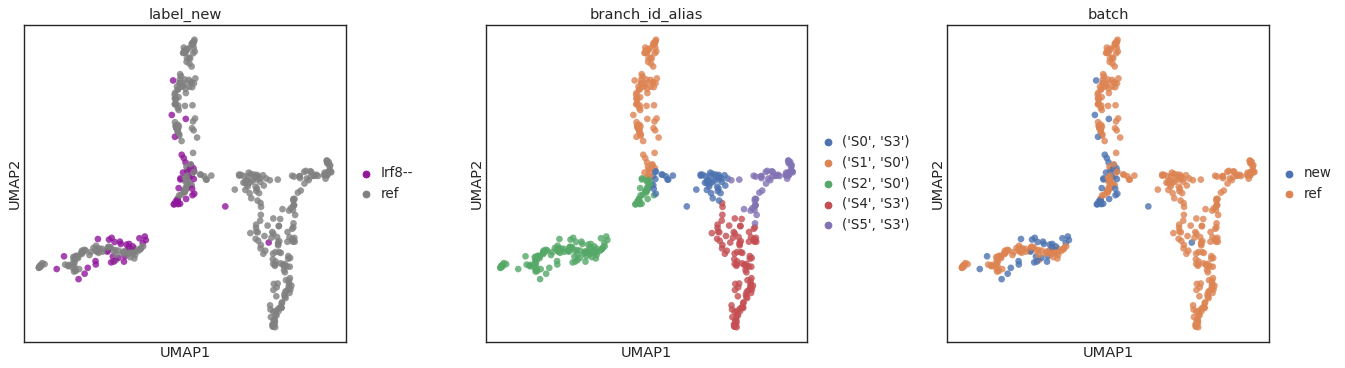

In [90]:
st.plot_visualization_2D(adata_combined_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

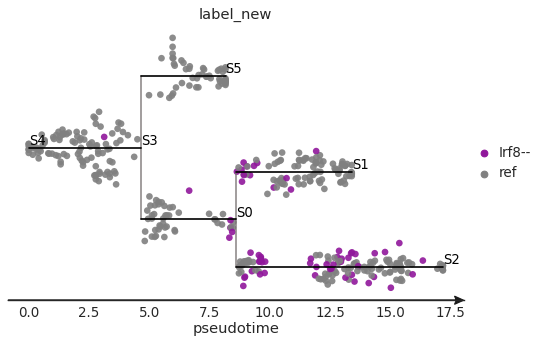

In [91]:
st.plot_stream_sc(adata_combined_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

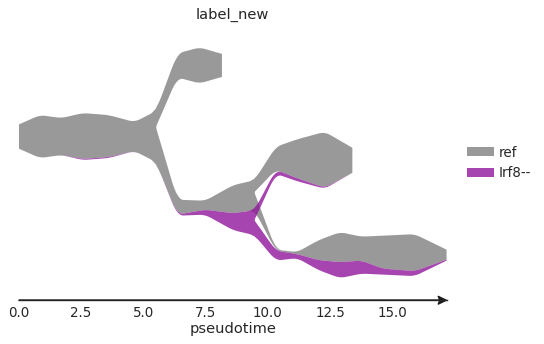

In [92]:
st.plot_stream(adata_combined_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.6,
               fig_legend_order={'label_new':['ref','Irf8--',]})

In [93]:
adata_combined_Gfi1_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


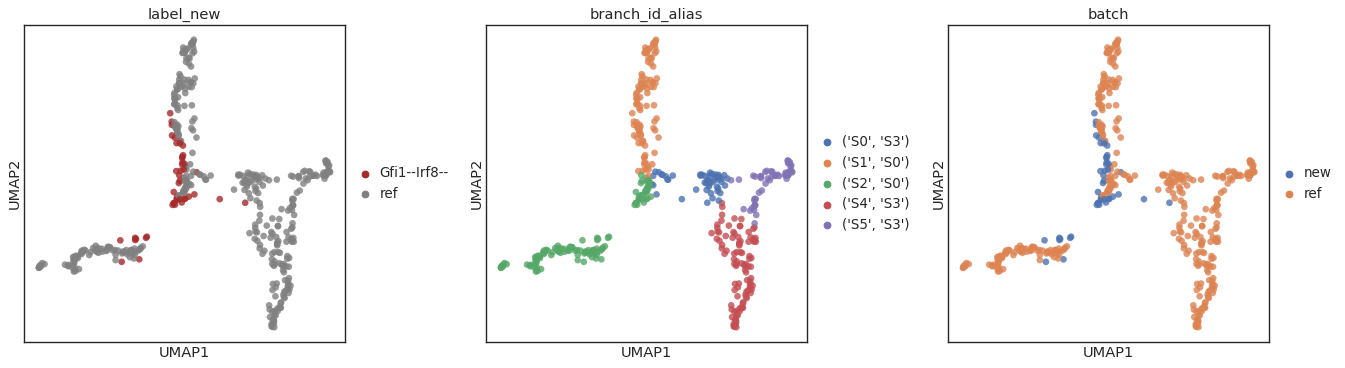

In [94]:
st.plot_visualization_2D(adata_combined_Gfi1_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

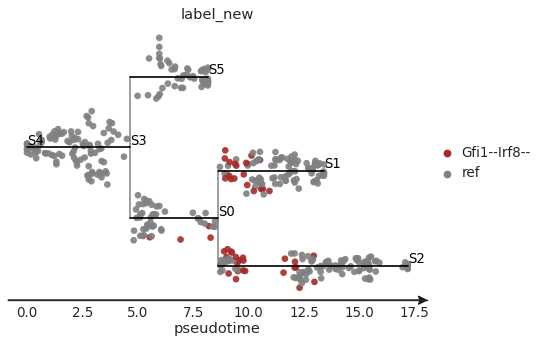

In [95]:
st.plot_stream_sc(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

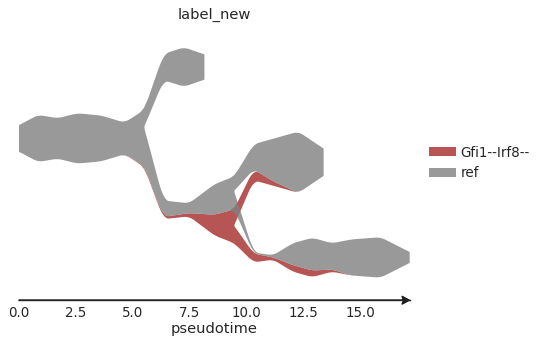

In [96]:
st.plot_stream(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.7)

In [97]:
st.write(adata,file_name='adata.pkl')
st.write(adata_new,file_name='adata_new.pkl')
st.write(adata_combined,file_name='adata_combined.pkl')

In [101]:
adata.uns = {}
adata.write_h5ad("orig.h5ad")

In [107]:
adata_new.write_h5ad("before_knockout.h5ad")

... storing 'label' as categorical


In [103]:
adata_combined.write_h5ad("combined_stream.h5ad")

... storing 'label' as categorical
... storing 'branch_id' as categorical
... storing 'branch_id_alias' as categorical
... storing 'label_new' as categorical
/opt/conda/lib/python3.7/site-packages/anndata/readwrite/write.py:255: UserWarning: dict key ('S0', 'S3') transformed to str upon writing to h5,using string keys is recommended
  .format(k)
/opt/conda/lib/python3.7/site-packages/anndata/readwrite/write.py:255: UserWarning: dict key ('S1', 'S0') transformed to str upon writing to h5,using string keys is recommended
  .format(k)
/opt/conda/lib/python3.7/site-packages/anndata/readwrite/write.py:255: UserWarning: dict key ('S2', 'S0') transformed to str upon writing to h5,using string keys is recommended
  .format(k)
/opt/conda/lib/python3.7/site-packages/anndata/readwrite/write.py:255: UserWarning: dict key ('S4', 'S3') transformed to str upon writing to h5,using string keys is recommended
  .format(k)
/opt/conda/lib/python3.7/site-packages/anndata/readwrite/write.py:255: UserWarning